# Movie Collection Prediction

## Import Header Pakages

In [1]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error


In [2]:

import pandas as pd

## Dataset

In [3]:
# Load the dataset
df = pd.read_csv("C:/Users/cyril/OneDrive/Pictures/SEM 6/assignment/Web Mining/Project/Works/movie_metadata.csv/movie_metadata.csv")



## Cleaning Data

In [4]:
# Drop irrelevant columns
df = df.drop(['color', 'movie_imdb_link'], axis=1)



In [5]:
#numeric values 

data_numeric = df.select_dtypes(include=[np.number]) # type: ignore
numeric_columns = data_numeric.columns.values

#non-numeric values

data_nonnumeric = df.select_dtypes(exclude=[np.number]) # type: ignore
nonnumeric_columns = data_nonnumeric.columns.values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name              4939 non-null   object 
 1   num_critic_for_reviews     4993 non-null   float64
 2   duration                   5028 non-null   float64
 3   director_facebook_likes    4939 non-null   float64
 4   actor_3_facebook_likes     5020 non-null   float64
 5   actor_2_name               5030 non-null   object 
 6   actor_1_facebook_likes     5036 non-null   float64
 7   gross                      4159 non-null   float64
 8   genres                     5043 non-null   object 
 9   actor_1_name               5036 non-null   object 
 10  movie_title                5043 non-null   object 
 11  num_voted_users            5043 non-null   int64  
 12  cast_total_facebook_likes  5043 non-null   int64  
 13  actor_3_name               5020 non-null   objec

In [7]:
#Clean remaining  Numerical columns

for col in numeric_columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    if num_missing>0:
        mid = df[col].median()
        df[col] = df[col].fillna(mid)

In [8]:
#clean the remaining missing values in non-numeric columns

for col in nonnumeric_columns:
    missing1 = df[col].isnull()
    num_missing1 = np.sum(missing1)
    if num_missing1>0:
        mod = df[col].describe()['top']
        df[col] = df[col].fillna(mod) 


In [9]:
# Split the dataset into training and testing sets
y = df['gross']
df = df.drop([ 'plot_keywords','director_name','title_year','content_rating','gross','duration','aspect_ratio' ,'movie_title','country','actor_2_name','actor_3_name','plot_keywords','actor_1_name','facenumber_in_poster','num_critic_for_reviews'], axis=1)




In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_facebook_likes    5043 non-null   float64
 1   actor_3_facebook_likes     5043 non-null   float64
 2   actor_1_facebook_likes     5043 non-null   float64
 3   genres                     5043 non-null   object 
 4   num_voted_users            5043 non-null   int64  
 5   cast_total_facebook_likes  5043 non-null   int64  
 6   num_user_for_reviews       5043 non-null   float64
 7   language                   5043 non-null   object 
 8   budget                     5043 non-null   float64
 9   actor_2_facebook_likes     5043 non-null   float64
 10  imdb_score                 5043 non-null   float64
 11  movie_facebook_likes       5043 non-null   int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 472.9+ KB


In [11]:
df

,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,genres,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,language,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,0.0,855.0,1000.0,Action|Adventure|Fantasy|Sci-Fi,886204,4834,3054.0,English,237000000.0,936.0,7.9,33000
1,563.0,1000.0,40000.0,Action|Adventure|Fantasy,471220,48350,1238.0,English,300000000.0,5000.0,7.1,0
2,0.0,161.0,11000.0,Action|Adventure|Thriller,275868,11700,994.0,English,245000000.0,393.0,6.8,85000
3,22000.0,23000.0,27000.0,Action|Thriller,1144337,106759,2701.0,English,250000000.0,23000.0,8.5,164000
4,131.0,371.5,131.0,Documentary,8,143,156.0,English,20000000.0,12.0,7.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5038,2.0,318.0,637.0,Comedy|Drama,629,2283,6.0,English,20000000.0,470.0,7.7,84
5039,49.0,319.0,841.0,Crime|Drama|Mystery|Thriller,73839,1753,359.0,English,20000000.0,593.0,7.5,32000
5040,0.0,0.0,0.0,Drama|Horror|Thriller,38,0,3.0,English,1400.0,0.0,6.3,16
5041,0.0,489.0,946.0,Comedy|Drama|Romance,1255,2386,9.0,English,20000000.0,719.0,6.3,660


## Label Encoding

In [12]:

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [13]:
df['language'] = label_encoder.fit_transform(df['language'])
df['genres'] = label_encoder.fit_transform(df['genres'])


In [14]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_facebook_likes    5043 non-null   float64
 1   actor_3_facebook_likes     5043 non-null   float64
 2   actor_1_facebook_likes     5043 non-null   float64
 3   genres                     5043 non-null   int32  
 4   num_voted_users            5043 non-null   int64  
 5   cast_total_facebook_likes  5043 non-null   int64  
 6   num_user_for_reviews       5043 non-null   float64
 7   language                   5043 non-null   int32  
 8   budget                     5043 non-null   float64
 9   actor_2_facebook_likes     5043 non-null   float64
 10  imdb_score                 5043 non-null   float64
 11  movie_facebook_likes       5043 non-null   int64  
dtypes: float64(7), int32(2), int64(3)
memory usage: 433.5 KB


## Spliting Data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=50)

## Score

In [16]:
import matplotlib.pyplot as plt
# Plot the predicted values against the actual values

def grap(y_pred):
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Values')
    plt.show()

## RandomForestRegressor

In [17]:
# Train a random forest regressor model
rf = RandomForestRegressor(n_estimators=50, random_state=50)


### Bagging

In [18]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import model_selection

# Create bagging classifier
baggingrf = BaggingRegressor(estimator= rf,n_estimators = 40, random_state = 50)

# Fit the model
baggingrf.fit(X_train, y_train)


BaggingRegressor(estimator=RandomForestRegressor(n_estimators=50,
                                                 random_state=50),
                 n_estimators=40, random_state=50)

0.6508595108485022


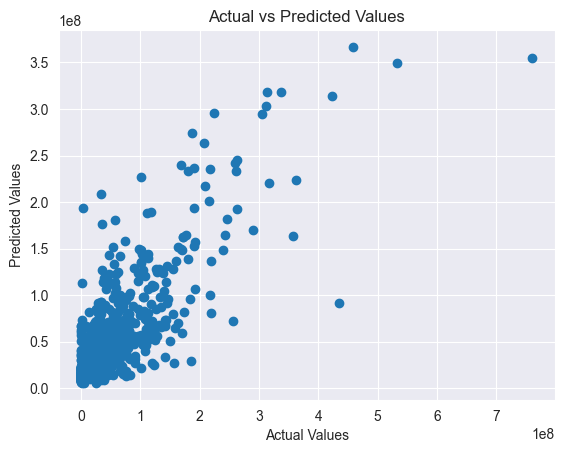

In [19]:
# Append the model and score to their respective list
print(baggingrf.score(X_test,y_test))
y_pred = baggingrf.predict(X_test)
grap(y_pred)

### Boosting

In [20]:
from sklearn.ensemble import AdaBoostClassifier

# Create an AdaBoost classifier with 50 base estimators
boostingrf = AdaBoostRegressor(estimator=baggingrf, n_estimators=40)

boostingrf.fit(X_train, y_train)

# Append the model and score to their respective list
print(boostingrf.score(X_test,y_test))

0.6598854496058313


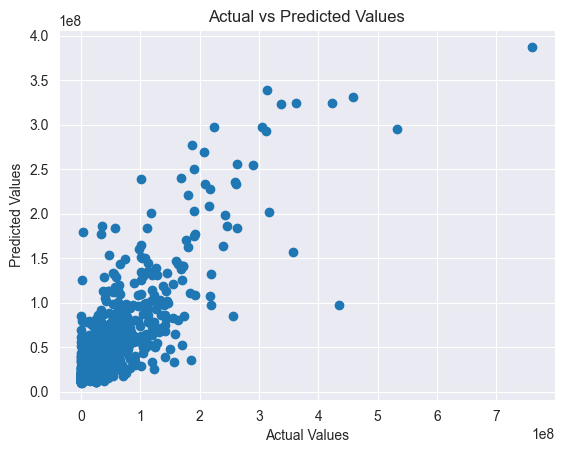

In [21]:
y_pred = boostingrf.predict(X_test)
grap(y_pred)

## LinearRegression

In [22]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

0.5188206052619975


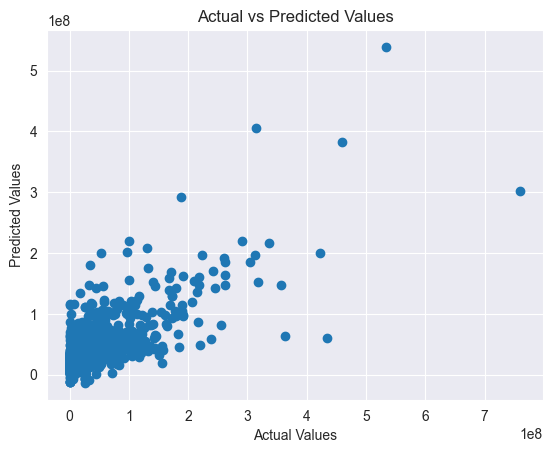

In [23]:
print(reg.score(X_test,y_test))
y_pred = reg.predict(X_test)
grap(y_pred)

### Bagging

In [24]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import model_selection

# Create bagging classifier
baggingreg = BaggingRegressor(estimator= reg,n_estimators = 40, random_state = 50)

# Fit the model
baggingreg.fit(X_train, y_train)

# Append the model and score to their respective list
print(baggingreg.score(X_test,y_test))


0.46699593530675987


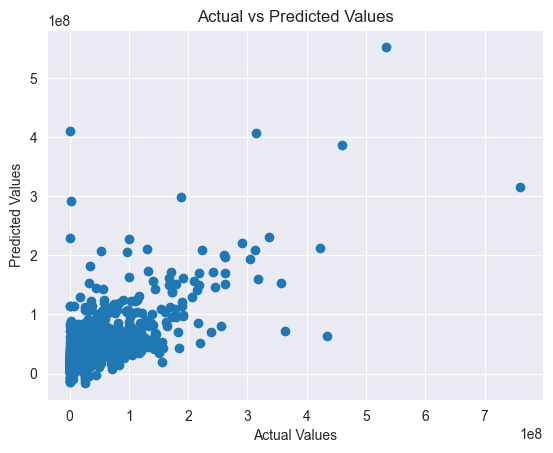

In [25]:
y_pred = baggingreg.predict(X_test)
grap(y_pred)

### Boosting

In [26]:
from sklearn.ensemble import AdaBoostClassifier

# Create an AdaBoost classifier with 50 base estimators
boostingreg = AdaBoostRegressor(estimator=baggingreg, n_estimators=40)

boostingreg.fit(X_train, y_train)

# Append the model and score to their respective list
print(boostingreg.score(X_test,y_test))

0.17099534406535288


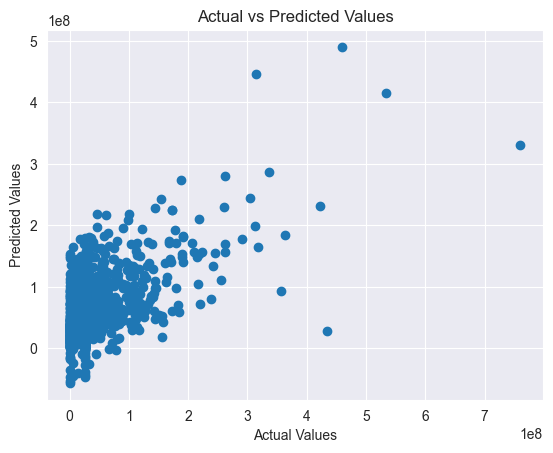

In [27]:
y_pred = boostingreg.predict(X_test)
grap(y_pred)

## DecisionTreeRegressor

In [28]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeRegressor


DT_entropy = DecisionTreeRegressor(random_state=50)

### Bagging

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt
from sklearn import model_selection

In [30]:
# Create bagging classifier
baggingdt = BaggingRegressor(estimator= DT_entropy,n_estimators = 40, random_state = 50)

# Fit the model
baggingdt.fit(X_train, y_train)

# Append the model and score to their respective list
print(baggingdt.score(X_test,y_test))


0.6436664379192775


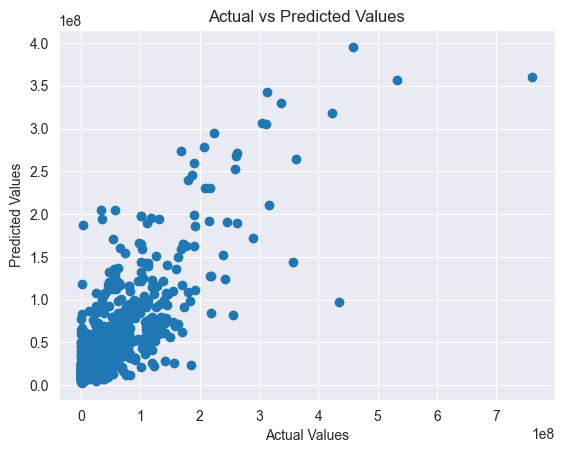

In [31]:
y_pred = baggingdt.predict(X_test)
grap(y_pred)

### Boosting

In [32]:
from sklearn.ensemble import AdaBoostClassifier

# Create an AdaBoost classifier with 50 base estimators
boostingdt = AdaBoostRegressor(estimator=baggingdt, n_estimators=40)

boostingdt.fit(X_train, y_train)

# Append the model and score to their respective list
print(baggingdt.score(X_test,y_test))

0.6436664379192775


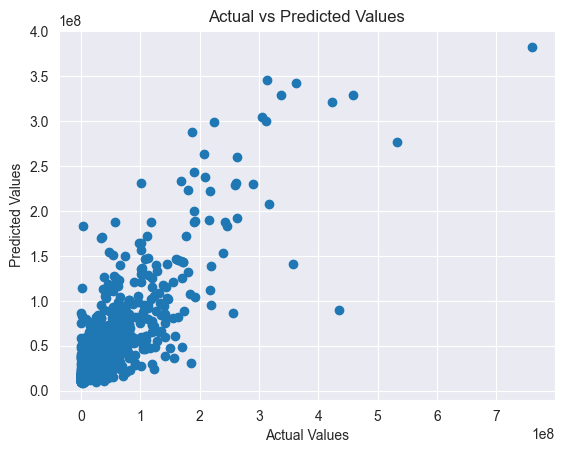

In [33]:
y_pred = boostingdt.predict(X_test)
grap(y_pred)

## SVM

In [34]:
#SVM

from sklearn import svm

sv = svm.SVR(kernel='rbf', C=1)

### Bagging

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt
from sklearn import model_selection

# Create bagging classifier
baggingsvm = BaggingRegressor(estimator= sv,n_estimators = 40, random_state = 50)

# Fit the model
baggingsvm.fit(X_train, y_train)




BaggingRegressor(estimator=SVR(C=1), n_estimators=40, random_state=50)

In [36]:
# Append the model and score to their respective list
print(baggingsvm.score(X_test,y_test))

-0.07718529117767625


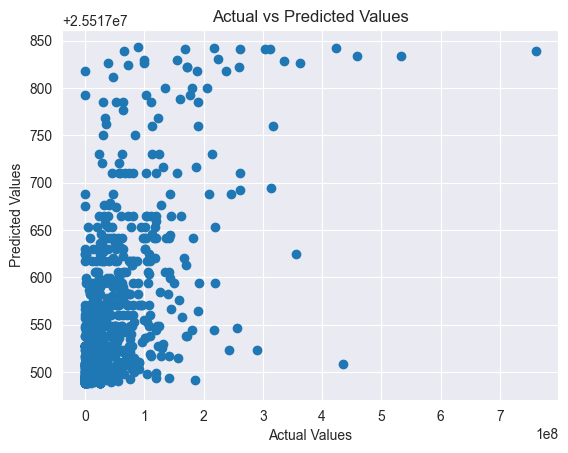

In [37]:
y_pred = baggingsvm.predict(X_test)
grap(y_pred)

### Boosting

In [38]:
from sklearn.ensemble import AdaBoostClassifier

# Create an AdaBoost classifier with 40 base estimators
boostingsvm = AdaBoostRegressor(estimator=baggingsvm, n_estimators=40)

boostingsvm.fit(X_train, y_train)



AdaBoostRegressor(estimator=BaggingRegressor(estimator=SVR(C=1),
                                             n_estimators=40, random_state=50),
                  n_estimators=40)

In [39]:
# Append the model and score to their respective list
print(baggingsvm.score(X_test,y_test))

-0.07718529117767625


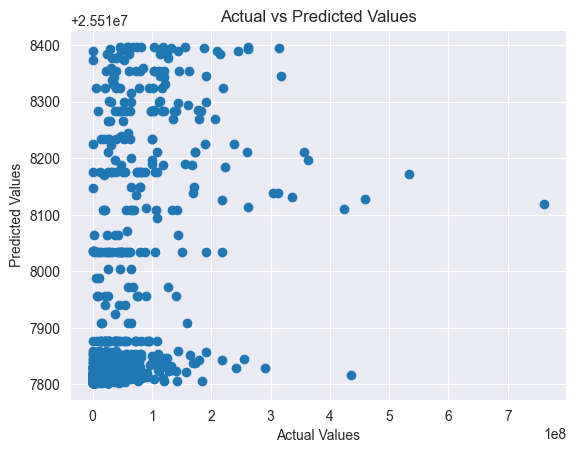

In [40]:
y_pred = boostingsvm.predict(X_test)
grap(y_pred)

## Voting

In [41]:
voting_regressor = VotingRegressor(estimators=[('boostingrf', boostingrf),('reg', reg), ('boostingdt', boostingdt)])
voting_regressor.fit(X_train, y_train)
y_pred = voting_regressor.predict(X_test)
mse_voting = mean_squared_error(y_test, y_pred)

In [42]:
# Append the model and score to their respective list
print(voting_regressor.score(X_test,y_test))

0.6599556132978974


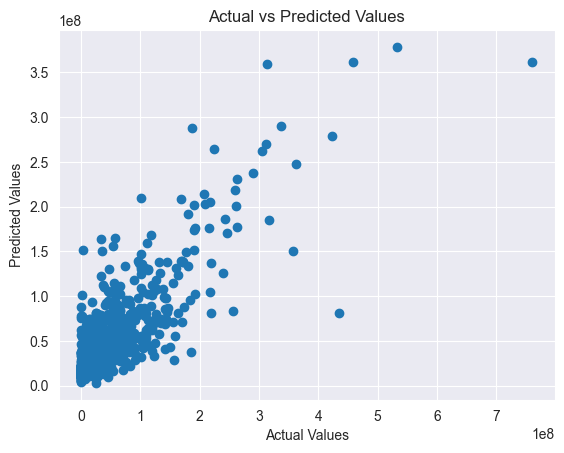

In [43]:
y_pred = voting_regressor.predict(X_test)
grap(y_pred)

## Loading the Model

In [44]:
import pickle

In [45]:
# save the model as a file
with open('model.pkl', 'wb') as file:
    pickle.dump(boostingrf, file)

In [46]:
model = pickle.load(open('C:/Users/cyril/OneDrive/Pictures/SEM 6/assignment/Web Mining/Project/Works/model.pkl', 'rb'))

## Predicting the Output From The User Input

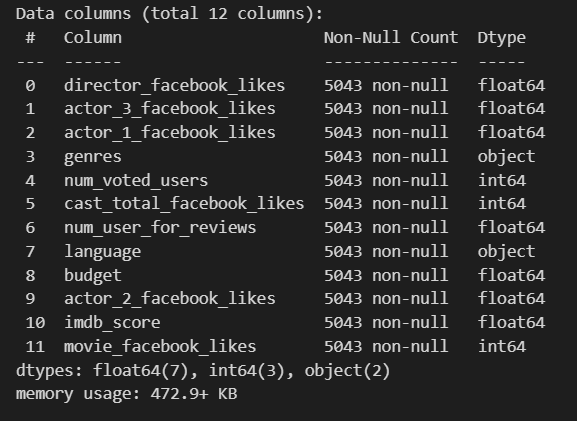

In [47]:
 from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [48]:
import numpy as np

In [49]:
import pandas as pd

# Load the dataset
df1 = pd.read_csv("C:/Users/cyril/OneDrive/Pictures/SEM 6/assignment/Web Mining/Project/Works/movie_metadata.csv/movie_metadata.csv")


In [50]:
#numeric values 

data_numeric = df1.select_dtypes(include=[np.number]) # type: ignore
numeric_columns = data_numeric.columns.values

#non-numeric values

data_nonnumeric = df1.select_dtypes(exclude=[np.number]) # type: ignore
nonnumeric_columns = data_nonnumeric.columns.values

In [51]:
#Clean remaining  Numerical columns

for col in numeric_columns:
    missing = df1[col].isnull()
    num_missing = np.sum(missing)
    if num_missing>0:
        mid = df1[col].median()
        df1[col] = df1[col].fillna(mid)

In [52]:
#clean the remaining missing values in non-numeric columns

for col in nonnumeric_columns:
    missing1 = df1[col].isnull()
    num_missing1 = np.sum(missing1)
    if num_missing1>0:
        mod = df1[col].describe()['top']
        df1[col] = df1[col].fillna(mod)

### Encoding The String Values to Numericals

In [53]:
df1['genres'] = label_encoder.fit_transform(df1['genres'])#Genre


In [54]:
#To Show the Real value from the Encoded Value
print(label_encoder.inverse_transform(np.array([222]).reshape(-1,1)))

['Action|Drama|Family|Sport']


C:\Users\cyril\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
df1['language'] = label_encoder.fit_transform(df1["language"])#language

In [56]:
#To Show the Real value from the Encoded Value
print(label_encoder.inverse_transform(np.array([22]).reshape(-1,1)))

['Japanese']


C:\Users\cyril\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Input

In [57]:

director_facebook_likes =600
actor_3_facebook_likes = 400
actor_1_facebook_likes = 800
genres = 222
num_voted_users = 300
cast_total_facebook_likes = 600
num_user_for_reviews =700
language =22
budget = 64958235
actor_2_facebook_likes = 500
imdb_score = 7
movie_facebook_likes = 500

In [58]:
sample = np.array([ director_facebook_likes , actor_3_facebook_likes , actor_1_facebook_likes ,genres, num_voted_users , cast_total_facebook_likes ,num_user_for_reviews ,language ,budget ,actor_2_facebook_likes,imdb_score, movie_facebook_likes   ]).reshape(1, -1)

### Prediction

In [59]:
y_pred = model.predict(sample)

C:\Users\cyril\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
  warnings.warn(


In [60]:
print(y_pred)

[24136182.71150001]
